
<a id='hs-invertibility-example'></a>
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>


<a id='index-0'></a>

# Shock Non Invertibility

## Contents

- [Shock Non Invertibility](#Shock-Non-Invertibility)  

This is another member of a suite of lectures that use the quantecon DLE class to instantiate models within the
[[HS13b]](https://lectures.quantecon.org/py/zreferences.html#hs2013) class of models described in detail in [Recursive Models of Dynamic Linear Economies](https://lectures.quantecon.org/py/hs_recursive_models.html)

In addition to what’s in Anaconda, this lecture uses the quantecon library

In [1]:
!pip install quantecon

We’ll make these imports

In [2]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
from quantecon import LQ
from quantecon import DLE
from math import sqrt
%matplotlib inline

This lecture can be viewed as introducing  an early contribution to what is now often called
a **news and noise** issue

In particular, it analyzes and illustrates an **invertibility** issue that is
endemic within a class of permanent income models

Technically, the invertibility problem indicates a situation in which
histories of the shocks in an econometrician’s autoregressive or Wold
moving average representation span a smaller information space than do
the shocks seen by the agent inside the econometrician’s model

This situation sets the stage for an econometrician who is unaware of the
problem to  misinterpret  shocks and likely responses to them

We consider the following modification  of Robert Hall’s (1978) model [[Hal78]](https://lectures.quantecon.org/py/zreferences.html#hall1978) in which the
endowment process is the sum of two orthogonal autoregressive processes:

**Preferences**

$$
-\frac{1}{2}\mathbb{E}\sum_{t=0}^\infty \beta^t[(c_t - b_t)^2 + l_t^2]|J_0
$$

$$
s_t = c_t
$$

$$
b_t = U_bz_t
$$

**Technology**

$$
c_t + i_t = \gamma k_{t-1} + d_t
$$

$$
k_t = \delta_k k_{t-1} + i_t
$$

$$
g_t = \phi_1 i_t \, , \phi_1 > 0
$$

$$
g_t \cdot g_t = l_t^2
$$

**Information**

$$
z_{t+1} =
\left[ {\begin{array}{cccccc}
   1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0.9 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0
   \end{array} }
   \right]
   z_t +
    \left[ {\begin{array}{cc}
   0 & 0 \\ 1 & 0 \\ 0 & 4 \\ 0 & 0 \\ 0 & 0 \\ 0 & 0
   \end{array} }
   \right]
   w_{t+1}
$$

$$
U_b =
  \left[ {\begin{array}{cccccc}
  30 & 0 & 0 & 0 & 0 & 0
  \end{array} }
  \right]
$$

$$
U_d =
   \left[ {\begin{array}{cccccc}
   5 & 1 & 1 & 0.8 & 0.6 & 0.4 \\ 0 & 0 & 0 & 0 & 0 & 0
   \end{array} }
   \right]
$$

The preference shock is constant at 30, while the endowment process is
the sum of a constant and two orthogonal processes

Specifically:

$$
d_t = 5 + d_{1t} + d_{2t}
$$

$$
d_{1t} = 0.9d_{1t-1} + w_{1t}
$$

$$
d_{2t} = 4w_{2t} + 0.8(4w_{2t-1})+ 0.6(4w_{2t-2})+ 0.4(4w_{2t-3})
$$

$ d_{1t} $ is a first-order AR process, while $ d_{2t} $ is a
third order pure moving average process

In [3]:
γ_1 = 0.05
γ = np.array([[γ_1], [0]])
ϕ_c = np.array([[1], [0]])
ϕ_g = np.array([[0], [1]])
ϕ_1 = 0.00001
ϕ_i = np.array([[1], [-ϕ_1]])
δ_k = np.array([[1]])
θ_k = np.array([[1]])
β = np.array([[1 / 1.05]])
l_λ = np.array([[0]])
π_h = np.array([[1]])
δ_h = np.array([[.9]])
θ_h = np.array([[1]]) - δ_h
ud = np.array([[5, 1, 1, 0.8, 0.6, 0.4],
               [0, 0, 0,   0,   0,   0]])
a22 = np.zeros((6, 6))
a22[[0, 1, 3, 4, 5], [0, 1, 2, 3, 4]] = np.array([1.0, 0.9, 1.0, 1.0, 1.0])  # Chase's great trick
c2 = np.zeros((6, 2))
c2[[1, 2], [0, 1]] = np.array([1.0, 4.0])
ub = np.array([[30, 0, 0, 0, 0, 0]])
x0 = np.array([[5], [150], [1], [0], [0], [0], [0], [0]])

Info1 = (a22, c2, ub, ud)
Tech1 = (ϕ_c, ϕ_g, ϕ_i, γ, δ_k, θ_k)
Pref1 = (β, l_λ, π_h, δ_h, θ_h)

Econ1 = DLE(Info1, Tech1, Pref1)

We define the household’s net of interest deficit as $ c_t - d_t $

Hall’s model imposes “expected present-value budget balance” in the
sense that

$$
\mathbb{E}\sum_{j=0}^\infty \beta^j (c_{t+j} - d_{t+j})|J_t = \beta^{-1}k_{t-1} \, \forall t
$$

If we define the moving average representation of
$ (c_t, c_t - d_t) $ in terms of the $ w_t $s to be:

$$
\left[ {\begin{array}{c}
  c_t \\ c_t - d_t
  \end{array} }
  \right]  = \left[ {\begin{array}{c}
  \sigma_1(L) \\ \sigma_2(L)
  \end{array} }
  \right] w_t
$$

then Hall’s model imposes the restriction
$ \sigma_2(\beta) = [0\,\,\,0] $

The agent inside this model sees histories of both components of the
endowment process $ d_{1t} $ and $ d_{2t} $

The econometrician has data on the history of the pair
$ [c_t,d_t] $, but not directly on the history of $ w_t $

The econometrician obtains a Wold representation for the process
$ [c_t,c_t-d_t] $:

$$
\left[ {\begin{array}{c}
  c_t \\ c_t - d_t
  \end{array} }
  \right]  = \left[ {\begin{array}{c}
  \sigma_1^*(L) \\ \sigma_2^*(L)
  \end{array} }
  \right] u_t
$$

The Appendix of chapter 8 of [[HS13b]](https://lectures.quantecon.org/py/zreferences.html#hs2013)  explains why the impulse
response functions in the Wold representation estimated by the
econometrician do not resemble the impulse response functions that
depict the response of consumption and the deficit to innovations to
agents’ information

Technically, $ \sigma_2(\beta) = [0\,\,\,0] $ implies that the
history of $ u_t $s spans a *smaller* linear space than does the
history of $ w_t $s

This means that $ u_t $ will typically be a distributed lag of
$ w_t $ that is not concentrated at zero lag:

$$
u_t = \sum_{j=0}^\infty \alpha_j w_{t-j}
$$

Thus, the econometrician’s news $ u_t $ potentially responds
belatedly to agents’ news $ w_t $

We will construct Figures from Chapter 8 Appendix E of [[HS13b]](https://lectures.quantecon.org/py/zreferences.html#hs2013) to
illustrate these ideas:

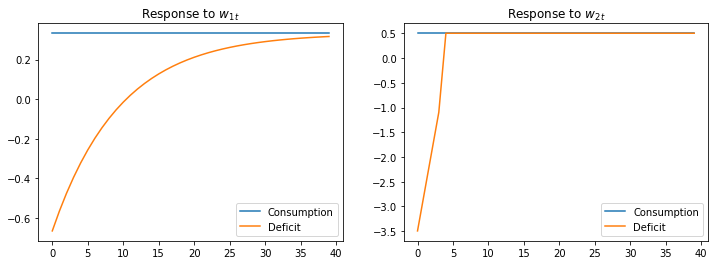

In [4]:
# This is Fig 8.E.1 from p.188 of HS2013

Econ1.irf(ts_length=40, shock=None)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(Econ1.c_irf, label='Consumption')
plt.plot(Econ1.c_irf - Econ1.d_irf[:,0].reshape(40,1), label='Deficit')
plt.legend()
plt.title('Response to $w_{1t}$')

shock2 = np.array([[0], [1]])
Econ1.irf(ts_length=40, shock=shock2)

plt.subplot(122)
plt.plot(Econ1.c_irf, label='Consumption')
plt.plot(Econ1.c_irf - Econ1.d_irf[:,0].reshape(40, 1), label='Deficit')
plt.legend()
plt.title('Response to $w_{2t}$')
plt.show()

The above figure displays the impulse response of consumption and the
deficit to the endowment innovations

Consumption displays the characteristic “random walk” response with
respect to each innovation

Each endowment innovation leads to a
temporary surplus followed by a permanent net-of-interest deficit

The temporary surplus just offsets the permanent deficit in terms of
expected present value

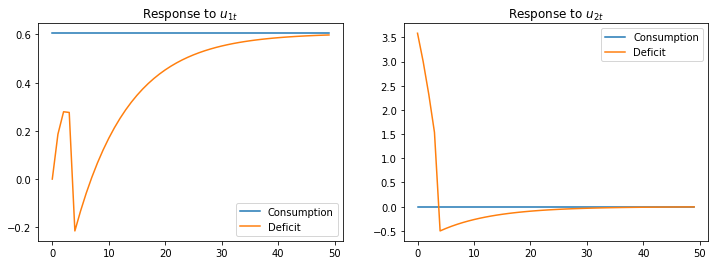

In [5]:
G_HS = np.vstack([Econ1.Sc, Econ1.Sc-Econ1.Sd[0, :].reshape(1, 8)])
H_HS = 1e-8 * np.eye(2)  # Set very small so there is no measurement error
LSS_HS = qe.LinearStateSpace(Econ1.A0, Econ1.C, G_HS, H_HS)

HS_kal = qe.Kalman(LSS_HS)
w_lss = HS_kal.whitener_lss()
ma_coefs = HS_kal.stationary_coefficients(50, 'ma')

# This is Fig 8.E.2 from p.189 of HS2013

ma_coefs = ma_coefs
jj = 50
y1_w1 = np.empty(jj)
y2_w1 = np.empty(jj)
y1_w2 = np.empty(jj)
y2_w2 = np.empty(jj)

for t in range(jj):
    y1_w1[t] = ma_coefs[t][0, 0]
    y1_w2[t] = ma_coefs[t][0, 1]
    y2_w1[t] = ma_coefs[t][1, 0]
    y2_w2[t] = ma_coefs[t][1, 1]

# This scales the impulse responses to match those in the book
y1_w1 = sqrt(HS_kal.stationary_innovation_covar()[0, 0]) * y1_w1
y2_w1 = sqrt(HS_kal.stationary_innovation_covar()[0, 0]) * y2_w1
y1_w2 = sqrt(HS_kal.stationary_innovation_covar()[1, 1]) * y1_w2
y2_w2 = sqrt(HS_kal.stationary_innovation_covar()[1, 1]) * y2_w2

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(y1_w1, label='Consumption')
plt.plot(y2_w1, label='Deficit')
plt.legend()
plt.title('Response to $u_{1t}$')

plt.subplot(122)
plt.plot(y1_w2, label='Consumption')
plt.plot(y2_w2, label='Deficit')
plt.legend()
plt.title('Response to $u_{2t}$')
plt.show()

The above figure displays the impulse response of consumption and the
deficit to the innovations in the econometrician’s Wold representation

- this is the object that would be recovered from a high order vector
  autoregression on the econometrician’s observations  


Consumption responds only to the first innovation

- this is indicative of the Granger causality imposed on the
  $ [c_t, c_t - d_t] $ process by Hall’s model: consumption Granger
  causes $ c_t - d_t $, with no reverse causality  

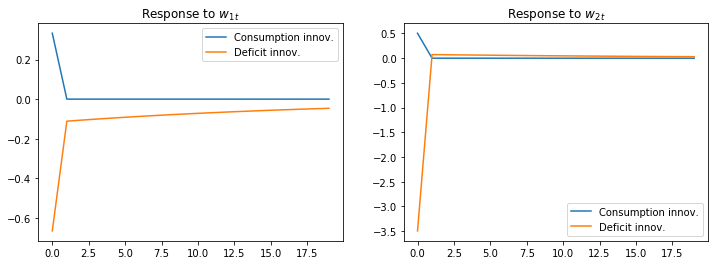

In [6]:
# This is Fig 8.E.3 from p.189 of HS2013

jj = 20
irf_wlss = w_lss.impulse_response(jj)
ycoefs = irf_wlss[1]
# Pull out the shocks
a1_w1 = np.empty(jj)
a1_w2 = np.empty(jj)
a2_w1 = np.empty(jj)
a2_w2 = np.empty(jj)

for t in range(jj):
    a1_w1[t] = ycoefs[t][0, 0]
    a1_w2[t] = ycoefs[t][0, 1]
    a2_w1[t] = ycoefs[t][1, 0]
    a2_w2[t] = ycoefs[t][1, 1]

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(a1_w1, label='Consumption innov.')
plt.plot(a2_w1, label='Deficit innov.')
plt.title('Response to $w_{1t}$')
plt.legend()
plt.subplot(122)
plt.plot(a1_w2, label='Consumption innov.')
plt.plot(a2_w2, label='Deficit innov.')
plt.legend()
plt.title('Response to $w_{2t}$')
plt.show()

The above figure displays the impulse responses of $ u_t $ to
$ w_t $, as depicted in:

$$
u_t = \sum_{j=0}^\infty \alpha_j w_{t-j}
$$

While the responses of the innovations to consumption are concentrated
at lag zero for both components of $ w_t $, the responses of the
innovations to $ (c_t - d_t) $ are spread over time (especially in
response to $ w_{1t} $)

Thus, the innovations to $ (c_t - d_t) $ as revealed by the vector
autoregression depend on what the economic agent views as “old news”